In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
trans_data = pd.read_excel("/content/drive/MyDrive/quntium/QVI_transaction_data.xlsx")

## ***Exploratory Data analysis***

In [3]:
trans_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
trans_data.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [5]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
trans_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [7]:
trans_data.isnull().sum()


# there are no missing values

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

<Axes: xlabel='TOT_SALES', ylabel='Count'>

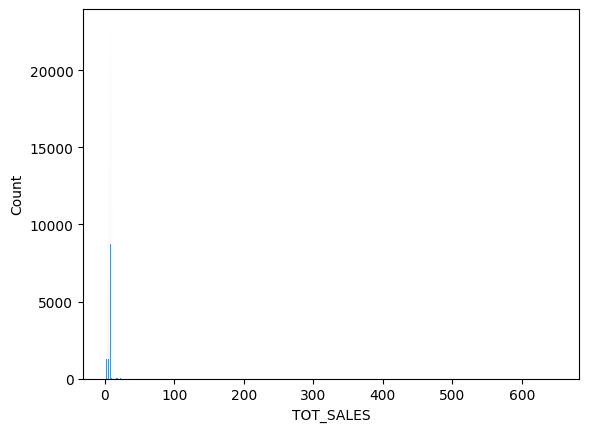

In [8]:
sns.histplot(trans_data['TOT_SALES'])

<Axes: >

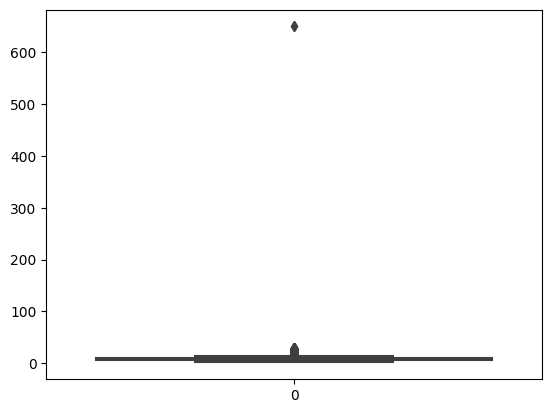

In [9]:

sns.boxplot(trans_data['TOT_SALES'])

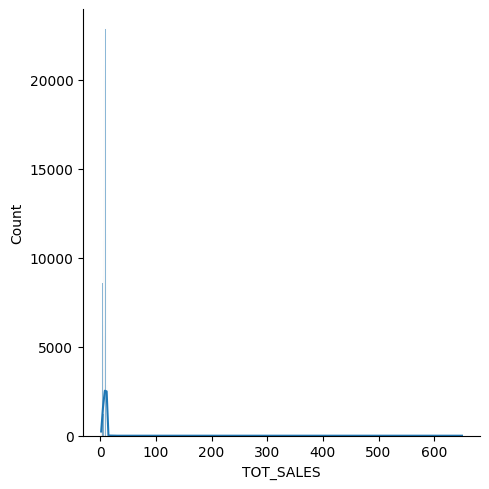

In [10]:
from seaborn.distributions import KDE
sns.displot(trans_data.TOT_SALES , kde = True)

## ***# Handling outliers with IQR method***

In [11]:
import numpy as np

from scipy import stats
Q1 = trans_data['TOT_SALES'].quantile(0.25)
Q3 = trans_data['TOT_SALES'].quantile(0.75)

IQR = Q3-Q1

lower_whisker = Q1-1.5*IQR

upper_whisker = Q3+1.5*IQR

print("lower whisker for TOT_SALES: ",lower_whisker)
print("upper whisker for TOT_SALES: ",upper_whisker)
print("IQR for TOT_SALES : ",IQR)

lower whisker for TOT_SALES:  -0.29999999999999805
upper whisker for TOT_SALES:  14.899999999999999
IQR for TOT_SALES :  3.799999999999999


In [12]:
print ("number of upper whiskers: ", trans_data[trans_data['TOT_SALES']>upper_whisker]['TOT_SALES'].count())

print("number of lower whiskers: ",trans_data[trans_data["TOT_SALES"]<lower_whisker]["TOT_SALES"].count())


number of upper whiskers:  578
number of lower whiskers:  0


In [13]:
trans_data.loc[(trans_data['TOT_SALES']<lower_whisker) | (trans_data['TOT_SALES']>upper_whisker)] = trans_data['TOT_SALES'].median()

In [14]:
print ("number of upper whiskers: ", trans_data[trans_data['TOT_SALES']>upper_whisker]['TOT_SALES'].count())

print("number of lower whiskers: ",trans_data[trans_data["TOT_SALES"]<lower_whisker]["TOT_SALES"].count())

number of upper whiskers:  0
number of lower whiskers:  0


<Axes: >

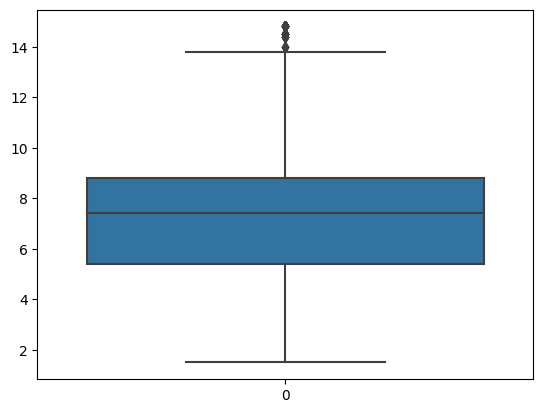

In [15]:
sns.boxplot(trans_data['TOT_SALES'])

In [16]:
# converting the categorical columns into binaries


dataset1 = pd.get_dummies(trans_data, columns=['PROD_NAME'])

In [17]:
dataset1.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_NAME_7.4,PROD_NAME_Burger Rings 220g,PROD_NAME_CCs Nacho Cheese 175g,...,PROD_NAME_WW Crinkle Cut Chicken 175g,PROD_NAME_WW Crinkle Cut Original 175g,PROD_NAME_WW D/Style Chip Sea Salt 200g,PROD_NAME_WW Original Corn Chips 200g,PROD_NAME_WW Original Stacked Chips 160g,PROD_NAME_WW Sour Cream &OnionStacked Chips 160g,PROD_NAME_WW Supreme Cheese Corn Chips 200g,PROD_NAME_Woolworths Cheese Rings 190g,PROD_NAME_Woolworths Medium Salsa 300g,PROD_NAME_Woolworths Mild Salsa 300g
0,43390.0,1.0,1000.0,1.0,5.0,2.0,6.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43599.0,1.0,1307.0,348.0,66.0,3.0,6.3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,43605.0,1.0,1343.0,383.0,61.0,2.0,2.9,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Data analysis of purchase behaviour**

In [18]:
data = pd.read_csv("/content/drive/MyDrive/quntium/QVI_purchase_behaviour.csv")

## ***Exploratory data analysis***

In [19]:
data.head(3)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [21]:
data.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [22]:
data.isnull().sum()


# no missing values

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

<Axes: >

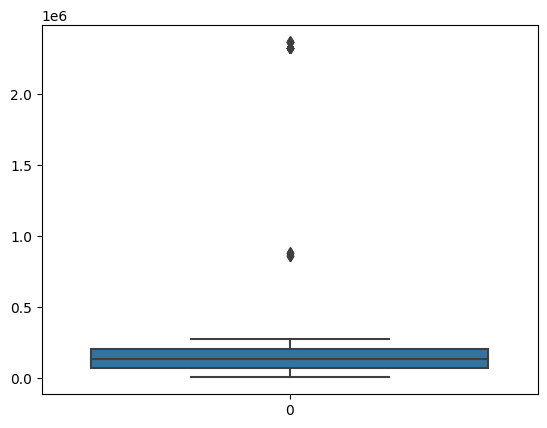

In [23]:
sns.boxplot(data['LYLTY_CARD_NBR'])




## ***outliers handling***

In [24]:
import numpy as np

from scipy import stats
Q1 = data['LYLTY_CARD_NBR'].quantile(0.25)
Q3 = data['LYLTY_CARD_NBR'].quantile(0.75)

IQR = Q3-Q1

lower_whisker = Q1-1.5*IQR

upper_whisker = Q3+1.5*IQR

print("lower whisker for LYLTY_CARD_NBR: ",lower_whisker)
print("upper whisker for LYLTY_CARD_NBR: ",upper_whisker)
print("IQR for LYLTY_CARD_NBR : ",IQR)

lower whisker for LYLTY_CARD_NBR:  -139557.5
upper whisker for LYLTY_CARD_NBR:  409134.5
IQR for LYLTY_CARD_NBR :  137173.0


In [25]:
print ("number of upper whiskers: ", data[data['LYLTY_CARD_NBR']>upper_whisker]['LYLTY_CARD_NBR'].count())

print("number of lower whiskers: ",data[data["LYLTY_CARD_NBR"]<lower_whisker]["LYLTY_CARD_NBR"].count())

number of upper whiskers:  34
number of lower whiskers:  0


In [26]:
data.loc[(data['LYLTY_CARD_NBR']<lower_whisker) | (data['LYLTY_CARD_NBR']>upper_whisker)] = data['LYLTY_CARD_NBR'].median()



# outliers replaced with median value

In [27]:
print ("number of upper whiskers: ", data[data['LYLTY_CARD_NBR']>upper_whisker]['LYLTY_CARD_NBR'].count())

print("number of lower whiskers: ",data[data["LYLTY_CARD_NBR"]<lower_whisker]["LYLTY_CARD_NBR"].count())

number of upper whiskers:  0
number of lower whiskers:  0


<Axes: >

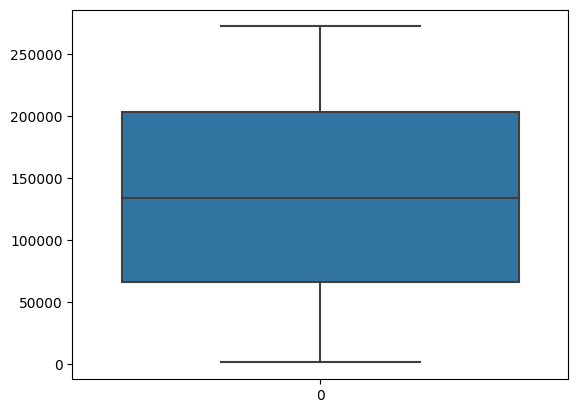

In [28]:
sns.boxplot(data['LYLTY_CARD_NBR'])


In [29]:
categorical_columns = ["LIFESTAGE", "PREMIUM_CUSTOMER"]

# Convert categorical columns into binary using get_dummies and rename columns
dummies = pd.get_dummies(data[categorical_columns], prefix=categorical_columns)

# Concatenate the original data with the new binary columns
data_encoded = pd.concat([data, dummies], axis=1)

# Remove the original categorical columns
data_encoded.drop(categorical_columns, axis=1, inplace=True)

# Print the encoded data
data_encoded.head()



,LYLTY_CARD_NBR,LIFESTAGE_134040.0,LIFESTAGE_MIDAGE SINGLES/COUPLES,LIFESTAGE_NEW FAMILIES,LIFESTAGE_OLDER FAMILIES,LIFESTAGE_OLDER SINGLES/COUPLES,LIFESTAGE_RETIREES,LIFESTAGE_YOUNG FAMILIES,LIFESTAGE_YOUNG SINGLES/COUPLES,PREMIUM_CUSTOMER_134040.0,PREMIUM_CUSTOMER_Budget,PREMIUM_CUSTOMER_Mainstream,PREMIUM_CUSTOMER_Premium
0,1000,0,0,0,0,0,0,0,1,0,0,0,1
1,1002,0,0,0,0,0,0,0,1,0,0,1,0
2,1003,0,0,0,0,0,0,1,0,0,1,0,0
3,1004,0,0,0,0,1,0,0,0,0,0,1,0
4,1005,0,1,0,0,0,0,0,0,0,0,1,0


In [30]:
data.LIFESTAGE.nunique()

8

In [31]:
merged_dataset = pd.merge(dataset1, data)

<ipython-input-31-2f5b045a8a6f>:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_dataset = pd.merge(dataset1, data)


In [32]:
merged_dataset.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_NAME_7.4,PROD_NAME_Burger Rings 220g,PROD_NAME_CCs Nacho Cheese 175g,...,PROD_NAME_WW D/Style Chip Sea Salt 200g,PROD_NAME_WW Original Corn Chips 200g,PROD_NAME_WW Original Stacked Chips 160g,PROD_NAME_WW Sour Cream &OnionStacked Chips 160g,PROD_NAME_WW Supreme Cheese Corn Chips 200g,PROD_NAME_Woolworths Cheese Rings 190g,PROD_NAME_Woolworths Medium Salsa 300g,PROD_NAME_Woolworths Mild Salsa 300g,LIFESTAGE,PREMIUM_CUSTOMER
0,43390.0,1.0,1000.0,1.0,5.0,2.0,6.0,0,0,0,...,0,0,0,0,0,0,0,0,YOUNG SINGLES/COUPLES,Premium
1,43599.0,1.0,1307.0,348.0,66.0,3.0,6.3,0,0,1,...,0,0,0,0,0,0,0,0,MIDAGE SINGLES/COUPLES,Budget
2,43414.0,1.0,1307.0,346.0,96.0,2.0,3.8,0,0,0,...,0,0,1,0,0,0,0,0,MIDAGE SINGLES/COUPLES,Budget


In [33]:
# merging both dataset

data = pd.merge(trans_data,data)

<ipython-input-33-34d39c5fefb0>:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  data = pd.merge(trans_data,data)


In [34]:
data.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390.0,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599.0,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414.0,1.0,1307.0,346.0,96.0,WW Original Stacked Chips 160g,2.0,3.8,MIDAGE SINGLES/COUPLES,Budget


In [35]:
# saving the merged file into csv

data.to_csv("merged_data.csv", index=False)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged data
merged_data = pd.read_csv("merged_data.csv")














## ***Data Analysis and Visualization***

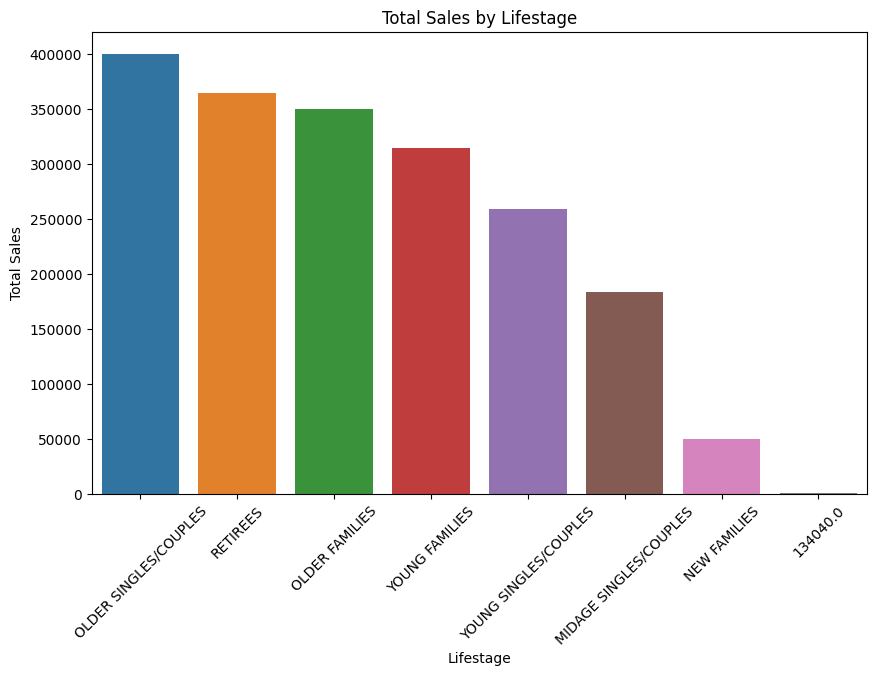

In [37]:
# Data Analysis 1: Total Sales by Lifestage
total_sales_by_lifestage = merged_data.groupby("LIFESTAGE")["TOT_SALES"].sum().sort_values(ascending=False)

# Bar plot of total sales by lifestage
plt.figure(figsize=(10, 6))
sns.barplot(x=total_sales_by_lifestage.index, y=total_sales_by_lifestage.values)
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.title("Total Sales by Lifestage")
plt.xticks(rotation=45)
plt.show()

Insights:

* Older singles / couples have the highest total sales among all lifestage categories.
* Other lifestage categories, such as Retirees , older families , Young families , young singles/couples also contribute significantly to the total sales.
* The lowest total sales are observed in the "New families" and "Midage Singles/Couples" lifestage categories.

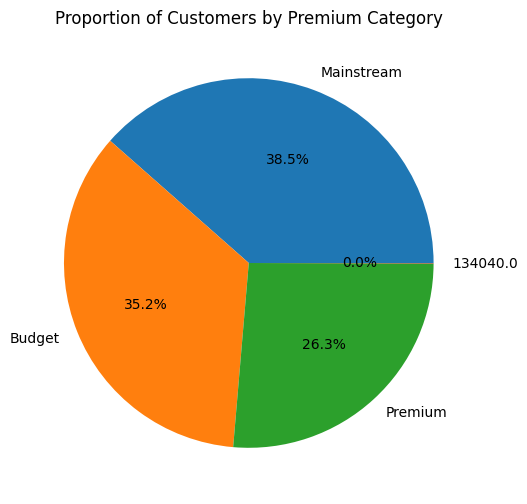

In [38]:
# Data Analysis 2: Proportion of Customers by Premium Category
customer_count_by_premium = merged_data["PREMIUM_CUSTOMER"].value_counts()

# Pie chart of customer count by premium category
plt.figure(figsize=(6, 6))
plt.pie(customer_count_by_premium, labels=customer_count_by_premium.index, autopct='%1.1f%%')
plt.title("Proportion of Customers by Premium Category")
plt.show()

# ***Insights*** -

* Proportion of Customers: The pie chart shows the distribution of customers across different premium categories. The results indicate that the mainstream category has the highest proportion, accounting for 38.5% of the customers. This suggests that a significant portion of your customer base falls into this category.

* Budget and Premium Categories: The pie chart reveals that the budget category comprises 35.2% of the customers. This indicates that there is a considerable portion of customers who prefer more budget-friendly options. Understanding the preferences and behaviors of these customers can help in developing appropriate pricing strategies and product offerings.

* Premium Category: The premium category represents 26.3% of the customers. This group consists of customers who are willing to spend more for premium products or services. Recognizing the characteristics and needs of this segment can assist in tailoring marketing efforts and providing high-value offerings to cater to their preferences.

* Potential Market Opportunities: The insights from the pie chart can highlight potential market opportunities for your business. For example, if the mainstream category has the largest proportion of customers, it might be beneficial to focus on strategies that cater specifically to their preferences and needs to maximize market reach.

* Market Segmentation: The distribution of customers across premium categories allows for market segmentation analysis. By understanding the characteristics and behaviors of customers in each category, you can create targeted marketing campaigns, personalized promotions, and product recommendations to enhance customer satisfaction and drive sales.

In [39]:
# Data Analysis 3: Average Sales per Transaction
avg_sales_per_transaction = merged_data.groupby("TXN_ID")["TOT_SALES"].sum().mean()
print('Average Sales per Transaction : ', avg_sales_per_transaction)

Average Sales per Transaction :  7.322822352080697


## ***Insights -***

* Transaction Value: The average sales per transaction gives you an idea of the typical amount of revenue generated from each transaction. In this case, the average transaction value is around 7.3228 units. This information can be useful for assessing the overall performance and financial health of the business.

* Pricing and Product Strategy: Analyzing the average sales per transaction can provide insights into the pricing strategy and the appeal of the products or services offered. If the average sales per transaction is relatively high, it may indicate that customers are willing to spend more on the products, suggesting either a higher-priced product offering or a perceived value that justifies the higher prices.

* Cross-Selling and Upselling Opportunities: Understanding the average sales per transaction can help identify opportunities for cross-selling or upselling. If the average sales per transaction is relatively low, it may indicate that customers are not adding additional items or higher-priced items to their purchases. This insight can guide efforts to improve cross-selling techniques or promote higher-priced items to increase the average sales per transaction.

* Customer Segmentation: Analyzing the average sales per transaction across different customer segments can provide insights into customer behavior and preferences. By comparing the average sales per transaction for different segments, such as new customers versus repeat customers or different demographic groups, you can identify segments that contribute more to the overall sales and tailor marketing strategies accordingly.

* Performance Monitoring: Tracking changes in the average sales per transaction over time can help monitor the effectiveness of pricing strategies, marketing campaigns, or changes in product offerings. If the average sales per transaction shows a consistent upward trend, it may indicate successful efforts to increase customer spending or attract higher-value transactions.

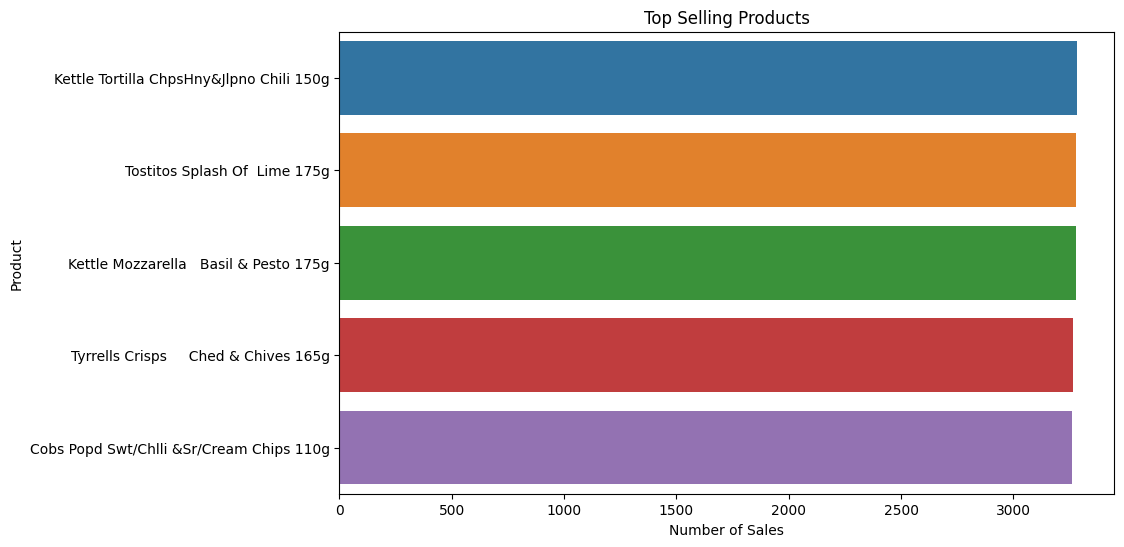

In [40]:
# Data Analysis 4: Top Selling Products
top_selling_products = merged_data["PROD_NAME"].value_counts().head(5)

# Bar plot of top selling products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_selling_products.values, y=top_selling_products.index)
plt.xlabel("Number of Sales")
plt.ylabel("Product")
plt.title("Top Selling Products")
plt.show()

## Insights -

The top 5 selling products based on the given analysis are as follows:

1.Kettle Tortilla Chips Honey & Jalapeno Chili 150g.
2.Tostitos Splash of Lime 175g.
3.Kettle Mozzarella Basil & Pesto 175g.
4.Tyrrells Crisps Cheddar & Chives 165g.
5.Cobs Popd Sour Cream & Chives 110g.





* Product Performance: The top selling products represent the most popular items in terms of sales. These products have consistently generated high sales volume, indicating a strong demand among customers. This information can be used to gauge the success of specific products and determine their contribution to overall revenue.

* Product Preferences: Analyzing the top selling products can provide insights into customer preferences and tastes. It indicates that customers have shown a preference for these particular products, which can help in understanding the factors that drive their purchasing decisions. This knowledge can inform product development, marketing strategies, and inventory management.

* Brand Influence: The top selling products may belong to specific brands that have a strong presence in the market. Brand recognition and loyalty can play a significant role in driving sales. By identifying the brands associated with these top selling products, businesses can evaluate the impact of brand reputation and develop strategies to strengthen their brand positioning.

* Market Share: The analysis of top selling products can also provide an indication of market share. If your business is selling these products, it suggests that you have captured a significant portion of the market for those specific items. Understanding market share can help evaluate competitiveness and inform strategic decisions related to pricing, promotions, and market expansion.

* Sales Trends: Tracking the top selling products over time can reveal sales trends and patterns. By monitoring the performance of these products, businesses can identify changes in customer preferences, shifts in market demand, or the impact of promotional activities. This information can guide decision-making and help adapt strategies to capitalize on emerging trends

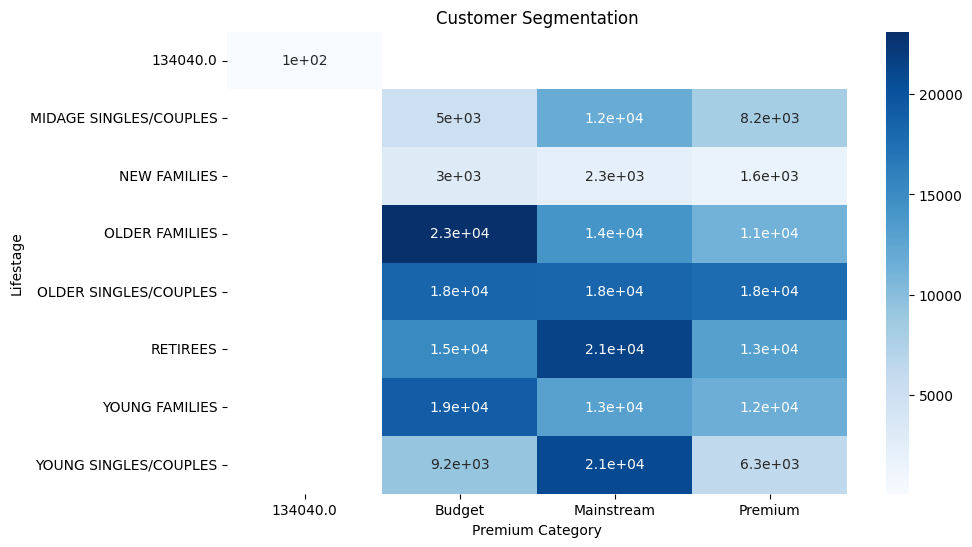

In [41]:
# Data Analysis 5: Customer Segmentation by Lifestage and Premium Category
segmentation = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].count().unstack()

# Heatmap of customer segmentation
plt.figure(figsize=(10, 6))
sns.heatmap(segmentation, annot=True, cmap="Blues")
plt.xlabel("Premium Category")
plt.ylabel("Lifestage")
plt.title("Customer Segmentation")
plt.show()


Insights -
* Lifestage Distribution: The counts highlight the distribution of customers across different lifestages. Each lifestage represents a distinct group with unique needs, preferences, and behaviors. Understanding the distribution allows businesses to tailor their marketing strategies and product offerings to cater to the specific requirements of each lifestage.

* Premium Category Preferences: Analyzing the counts within each lifestage reveals the preferences for different premium categories. It indicates which premium category has the highest customer count within each lifestage segment. This insight can guide businesses in targeting specific premium categories to effectively reach and engage their target audience.

* Market Potential: By examining the counts across lifestages and premium categories, businesses can identify segments with the highest customer counts. These segments represent potential areas of focus for marketing and sales efforts. For example, if the "Young Singles/Couples" lifestage has a high customer count in the "Mainstream" premium category, it may suggest a market with significant potential for product offerings tailored to that segment.

* Customer Segmentation: The customer counts provide a basis for segmenting customers based on lifestage and premium category. By further analyzing the characteristics, behaviors, and purchasing patterns of customers within each segment, businesses can develop targeted marketing campaigns, personalized offers, and tailored customer experiences.

* Business Strategy Alignment: The insights derived from customer counts can help align business strategies with the dominant customer segments. For example, if "New Families" have a high customer count in the "Budget" premium category, it may indicate an opportunity to offer cost-effective products and promotions that cater to the needs of this segment.

* Competitive Analysis: Comparing the customer counts across lifestages and premium categories can provide insights into market competition. By benchmarking against competitors or industry averages, businesses can assess their market share and identify areas where they may need to focus on capturing a larger customer base.

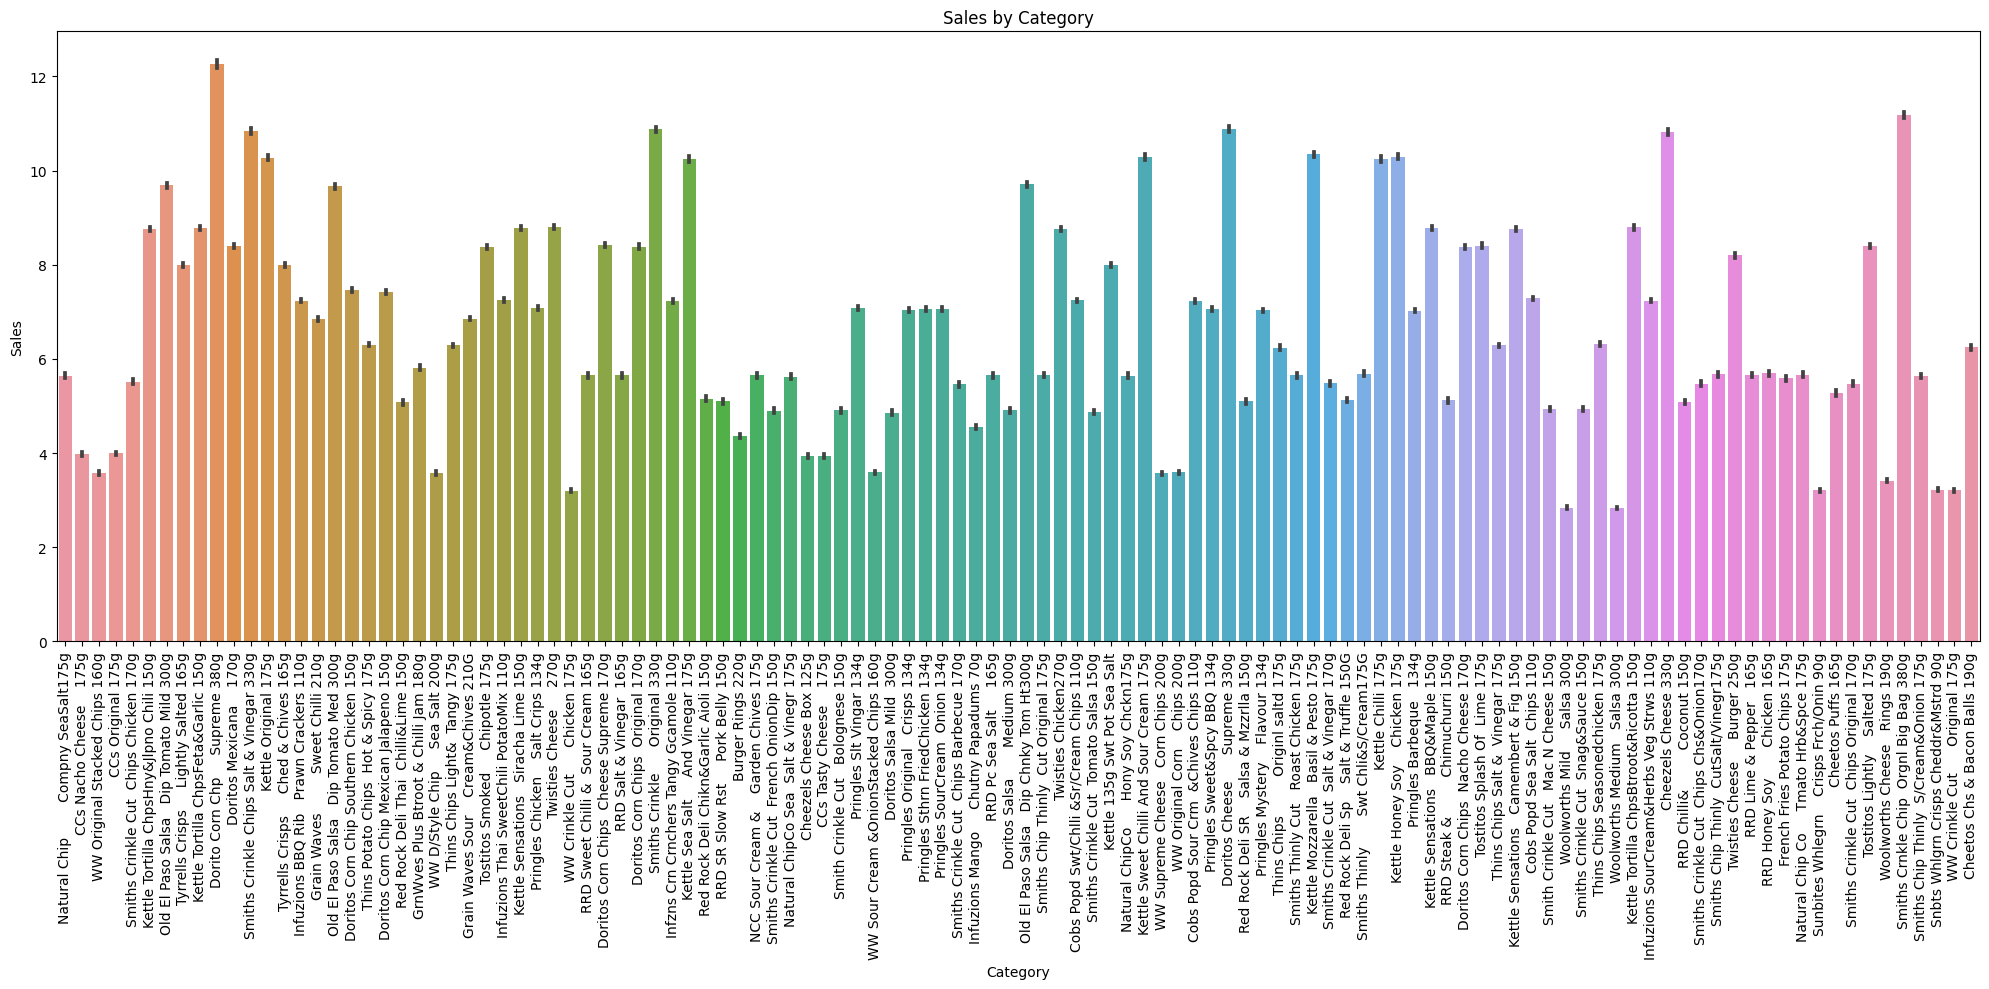

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the sales by category
plt.figure(figsize=(20, 10))
sns.barplot(x="PROD_NAME", y="TOT_SALES", data=data )

# Set labels and title
plt.xlabel("Category")
plt.ylabel("Sales")
plt.title("Sales by Category")
plt.xticks(rotation=90)
plt.tight_layout()
# Display the chart
plt.show()


The top 5 selling products based on the given analysis are as follows:

1. Dorito corn chp supreme 380g.
2. Smiths crnkle chip orgnl big bag 380g.
3. Smith crinkle original 170g.
4. Cheezles cheese 330g.
5. Doritos cheeze supreme 330g.

In [42]:
# Group data by store and calculate total profit
store_profit = merged_data.groupby("STORE_NBR")["TOT_SALES"].sum()

# Find the store with the highest profit
highest_profit_store = store_profit.idxmax()

print("The highest profiting store is Store:", highest_profit_store)


The highest profiting store is Store: 226.0


* Store 226.0 has achieved the highest profit among all stores, indicating its strong financial performance.

* The success of Store 226.0 highlights effective strategies and operational efficiency that can serve as benchmarks for other stores.

* Analyzing the factors contributing to the high profitability of Store 226.0 can provide valuable insights for improving overall store performance.

* Store 226.0 demonstrates the potential for generating significant sales and profit within the business, showcasing a successful model that can be replicated or used as inspiration for growth strategies.

In [43]:
total_sales = data["TOT_SALES"].sum()
print("Total Sales:", total_sales)

Total Sales: 1922299.4500000004
